# MNIST handwritten digits classification
>The **MNIST** database (*Modified National Institute of Standards and Technology database*) is a large database of handwritten digits that is commonly used for training various image processing systems. It contains 70.000 images.

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

### Loading the dataset

In [136]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

Let's take a look at first 15 digits in dataset and their labels.

In [137]:
def show_numbers(X, y, quantity):
    plt.figure(figsize=(15,3))
    size = int(len(X[0])**(1/2))
    for i, (image, label) in enumerate(zip(X[:quantity], y[:quantity])):
        plt.subplot(1, quantity, i+1)
        plt.imshow(np.reshape(image, (size, size)), cmap=plt.cm.binary)
        plt.axis('off')
        plt.title(label)  
    plt.show()   

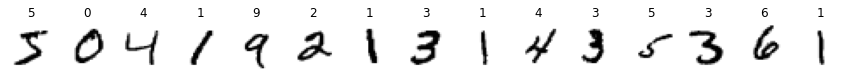

In [138]:
show_numbers(X, y, 15)

Let's see the number of images of each class and make sure the dataset is balanced.

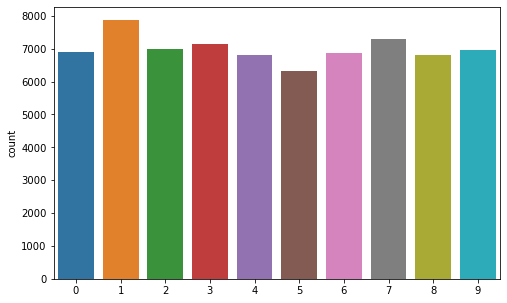

In [125]:
plt.figure(figsize=(8,5))
figure = sns.countplot(x=y, order=[str(i) for i in range(10)])

### Preprocessing
Shuffling dataset and splitting into test and train.

In [139]:
rs = check_random_state(42)
permutation = rs.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Scaling dataset.

In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic regression

In [146]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000)

In [147]:
%%time
clf.fit(X_train_scaled, y_train)

CPU times: user 9min 41s, sys: 15.6 s, total: 9min 56s
Wall time: 4min 10s


LogisticRegression(max_iter=1000)

In [156]:
predictions = clf.predict(X_test_scaled)

Predicted labels

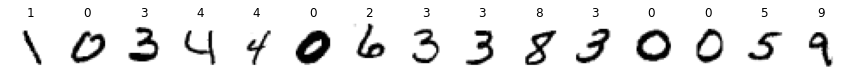

In [159]:
show_numbers(X_test, predictions, 15)

Actual labels

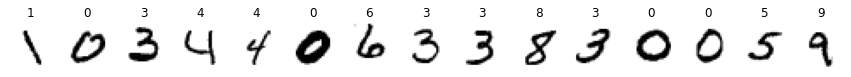

In [182]:
show_numbers(X_test, y_test, 15)

### Model perfomance

In [161]:
print(f'Accuracy: {accuracy_score(predictions, y_test):.3f}')

Accuracy: 0.921


Let's plot confusion matrix.

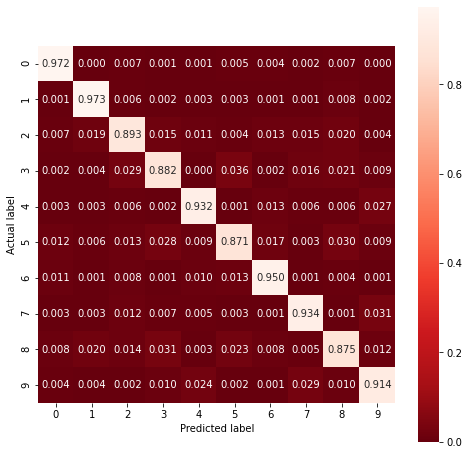

In [184]:
cm = confusion_matrix(y_test, predictions)
norm_cm = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,8))
sns.heatmap(norm_cm, annot=True, square=True, cmap=plt.cm.Reds_r, fmt='.3f')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()